In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as scs
import math

In [2]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    """Helpful function to plot timeseries"""
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [3]:
def OSR2(predictions, train, test):
    sse = sum((test - predictions)**2)
    sst = sum((test - np.mean(train))**2)
    r2 = 1 - sse/sst
    
    return r2

In [4]:
df = pd.read_csv("data_RRC.csv")   # change dataset name

In [5]:
df.head()

,Unnamed: 0,timestamp,open,high,low,close,volume,time,EMA,time.1,RSI,time.2,MFI
0,0,2019-04-15,10.24,10.4127,9.965,10.16,8621176,2019-04-15,10.5927,2019-04-15,41.4156,2019-04-15,35.1033
1,1,2019-04-12,10.72,10.7800,10.255,10.32,8495721,2019-04-12,10.6593,2019-04-12,43.5194,2019-04-12,43.2825
2,2,2019-04-11,10.45,10.5400,10.190,10.34,5534657,2019-04-11,10.7115,2019-04-11,43.7775,2019-04-11,34.5891
3,3,2019-04-10,10.63,10.8200,10.500,10.55,5661052,2019-04-10,10.7686,2019-04-10,46.4644,2019-04-10,34.7333
4,4,2019-04-09,10.93,10.9600,10.540,10.59,5961101,2019-04-09,10.8022,2019-04-09,46.9743,2019-04-09,42.0195


In [6]:
# interested in 1-day close price
close = df.close
close.name = 'close'
close.head()

0    10.16
1    10.32
2    10.34
3    10.55
4    10.59
Name: close, dtype: float64

In [7]:
len(close)

5341

In [9]:
train = close.loc[:len(close) -  int(len(close)*0.15) -1]
test = close.loc[len(close) -  int(len(close)*0.15):]
print(train.tail())
print(test.head())

4535    5.15
4536    5.15
4537    5.50
4538    5.38
4539    5.62
Name: close, dtype: float64
4540    5.65
4541    5.73
4542    5.63
4543    5.26
4544    5.71
Name: close, dtype: float64


Text(0,0.5,'1-day close price of train set')

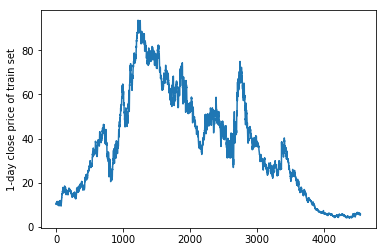

In [10]:
# is 1-day close price  stationary?
train.plot()
plt.ylabel('1-day close price of train set')

Text(0,0.5,'1-day close price of test set')

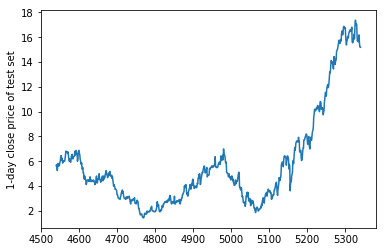

In [11]:
test.plot()
plt.ylabel('1-day close price of test set')

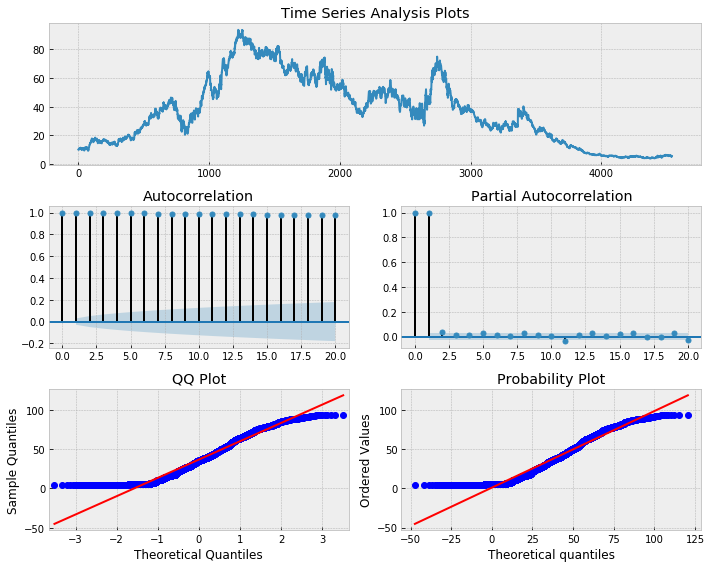

In [12]:
tsplot(train, lags=20)

In [13]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is not small enough to reject the null-hypothesis that the TS is non-stationary

(-1.2152121905434814,
 0.6670178181948969,
 20,
 4519,
 {'1%': -3.4317978907785607,
  '5%': -2.8621797961703126,
  '10%': -2.567110566850564},
 13894.595921185204)

Text(0,0.5,'Difference in 1-day close price')

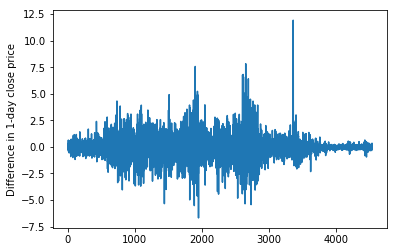

In [14]:
# are the difference between two 1-day close price stationary?
train_diff = train.diff().dropna()
train_diff.name = 'train close diff'
train_diff.plot()
plt.ylabel('Difference in 1-day close price')

In [15]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train_diff, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is small enough to reject the null-hypothesis that the TS is non-stationary

(-15.805298618267111,
 1.0622402116150819e-28,
 19,
 4519,
 {'1%': -3.4317978907785607,
  '5%': -2.8621797961703126,
  '10%': -2.567110566850564},
 13891.92640423758)

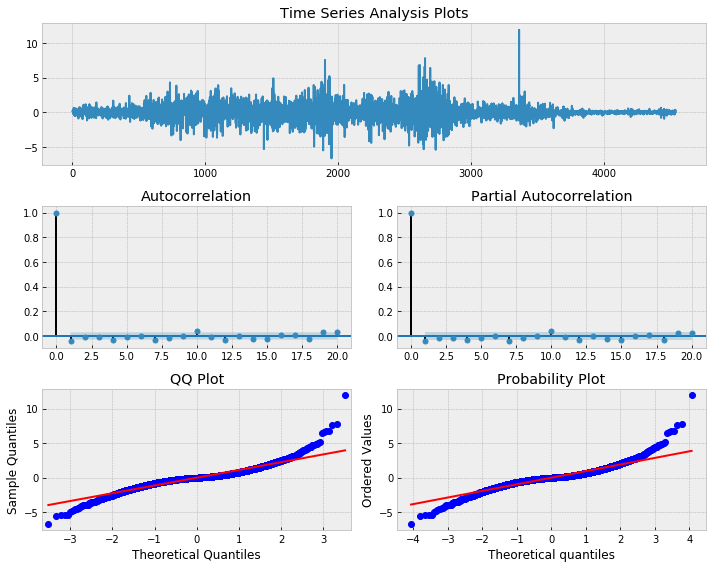

In [16]:
tsplot(train_diff, lags=20)

### Fit Model

In [17]:
arima110 = smt.ARIMA(train, (1,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima110_fit = arima110.fit() #change model name*2
arima110_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4539
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -6970.618
Method:                       css-mle   S.D. of innovations              1.124
Date:                Wed, 17 Apr 2019   AIC                          13947.235
Time:                        16:43:50   BIC                          13966.497
Sample:                             1   HQIC                         13954.019
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0010      0.016     -0.063      0.950      -0.032       0.030
ar.L1.D.close    -0.0422      0.015     -2.843      0.004      -0.071      -0.013
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -23.7242           +0.0000j           23.7242            0.5000
-----------------------------------------------------------------------------
"""

In [18]:
arima011 = smt.ARIMA(train, (0,1,1)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima011_fit = arima011.fit() #change model name*2
arima011_fit.summary() #change model name

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4539
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -6970.507
Method:                       css-mle   S.D. of innovations              1.124
Date:                Wed, 17 Apr 2019   AIC                          13947.014
Time:                        16:44:19   BIC                          13966.276
Sample:                             1   HQIC                         13953.798
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0010      0.016     -0.063      0.950      -0.032       0.030
ma.L1.D.close    -0.0433      0.015     -2.882      0.004      -0.073      -0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           23.0770           +0.0000j           23.0770            0.0000
-----------------------------------------------------------------------------
"""

In [19]:
arima111 = smt.ARIMA(train, (1,1,1)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima111_fit = arima111.fit() #change model name*2
arima111_fit.summary() #change model name

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4539
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6965.621
Method:                       css-mle   S.D. of innovations              1.123
Date:                Wed, 17 Apr 2019   AIC                          13939.241
Time:                        16:44:40   BIC                          13964.923
Sample:                             1   HQIC                         13948.286
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0010      0.013     -0.079      0.937      -0.027       0.025
ar.L1.D.close     0.8451      0.053     16.011      0.000       0.742       0.949
ma.L1.D.close    -0.8788      0.047    -18.710      0.000      -0.971      -0.787
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1833           +0.0000j            1.1833            0.0000
MA.1            1.1379           +0.0000j            1.1379            0.0000
-----------------------------------------------------------------------------
"""

### Analyze residuals

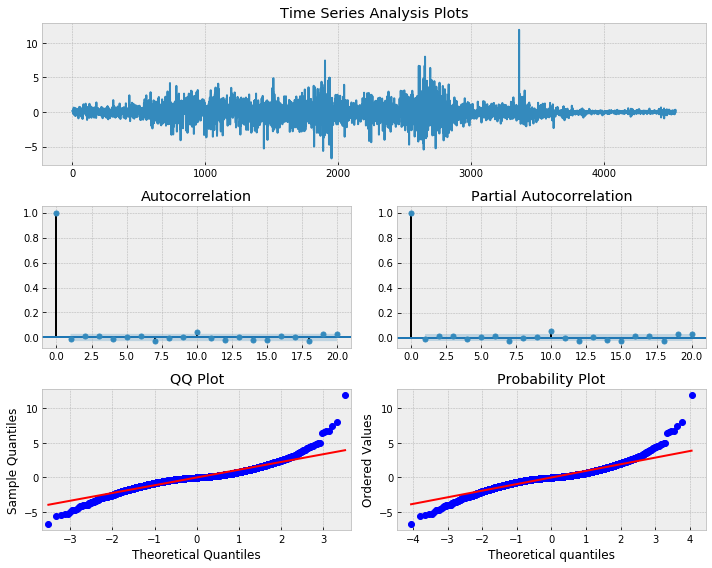

In [20]:
tsplot(arima111_fit.resid, lags=20) #change model name

### Test for remaining autocorrelation

In [21]:
# Ljung box test for remaining autocorrelation
sms.diagnostic.acorr_ljungbox(arima111_fit.resid, lags=(5,)) # or 10 lags       #change model name
#第二个是p-value  p值大于5%,序列为白噪声

(array([2.78166059]), array([0.73360326]))

### Forecasting

In [22]:
num_steps = 5
forecast_mean, forecast_std, forecast_ci = arima111_fit.forecast(steps=num_steps)   #change model name

In [23]:
arima111_fit.forecast(steps=num_steps)   #change model name

(array([5.61692304, 5.61416347, 5.61167211, 5.60940741, 5.60733426]),
 array([1.12263122, 1.56107503, 1.88285953, 2.14408902, 2.3669989 ]),
 array([[ 3.41660629,  7.8172398 ],
        [ 2.55451263,  8.6738143 ],
        [ 1.92133525,  9.30200896],
        [ 1.40707014,  9.81174468],
        [ 0.96810167, 10.24656686]]))

In [24]:
arima111_fit.forecast(steps=num_steps)[0][4]    #change model name

5.6073342625179645

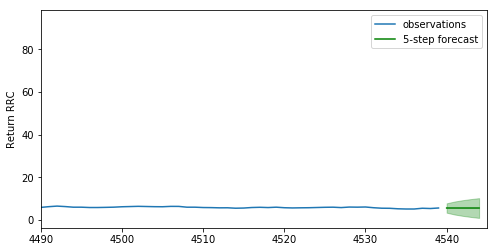

In [25]:
plt.figure(figsize=(8, 4))


plt.plot(train, label='observations')

forecast_steps = range(len(train), len(train) + num_steps)
plt.fill_between(forecast_steps, forecast_ci[:,0], forecast_ci[:,1], color='g', alpha=0.3)
plt.plot(forecast_steps, forecast_mean, label='5-step forecast', color='g')
plt.xlim([len(train) - 50, len(train) + num_steps])
plt.ylabel('Return RRC')   #change stock name
plt.legend()

### Calculate the performance metrics on test set

In [26]:
pred = []
for i in range( int(len(close)*0.15)): 
    moving_train = close.loc[:len(close) -  int(len(close)*0.15) -5 + i]
    moving_arima111 = smt.ARIMA(moving_train, (1,1,1))   #change model parameters  & model name
    moving_arima111_fit = moving_arima111.fit()   #change model name*2
    
    pred.append(moving_arima111_fit.forecast(steps=5)[0][4]) #change model name

len(pred)

801

In [27]:
#(1,1,1)  
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.99965774544588
MAE = 0.446210158734324
RMSE = 0.5747600279096765
Scaled MAE = 0.028007165373733618
Scaled RMSE = 0.03607582399633922
